## 常用函數

In [81]:
''' NLP常用函数 '''

s = 'AbCa'
t = 'a'


print(s.endswith(t))      # 测试s是否以t结尾
print(t in s)
print(s.islower())
print(s.isupper())
print(s.isalpha())       # 测试s中所有字符是否都为字母
print(s.isalnum())        # 测试s中所有字符是否都为字母或数字
print(s.isdigit())        # 测试s中所有字符是否都为数字
print(s.istitle())

True
True
False
False
True
True
False
False


## 拼寫檢查

In [3]:
from enchant.checker import SpellChecker

Paper = '''The human organism coexists with its microbiota in a symbiotic relationship. 
These polymicrobial communities are involved in many crucial functions, such as immunity, protection against pathogens, and metabolism of dietary compounds, thus maintaining homeostasis. 
The oral cavity and the colon, although distant anatomic regions, are both highly colonized by distinct microbiotas. However, studies indicate that oral bacteria are able to disseminate into the colon. 
This is mostly evident in conditions such as periodontitis, where specific bacteria, namely Fusobacterium nucrelatum and Porphyromonas gingivalis project a pathogenic profile. 
In the colon these bacteria can alter the composition of the residual microbiota, in the context of complex biofilms, resulting in intestinal dysbiosis. 
This orally-driven disruption promotes aberrant immune and inflammatory responses, eventually leading to colorectal cancer (CRC) tumorigenesis. 
Understanding the exact mechanisms of these interactions will yield future opportunities regarding prevention and treatment of CRC.'''

Paper = "Many peope likee to watch In the Name of People."


chkr = SpellChecker("en_US")
chkr.set_text(Paper)
for err in chkr:    
    print ("ERROR:", err.word)

ERROR: peope
ERROR: likee


## Google翻譯API

In [18]:
from google_trans_new import google_translator  
translator = google_translator()  

In [26]:
Sentence = "It's funny"
translate_text = translator.translate(Sentence,lang_src='en,',lang_tgt='zh-tw') 
print('Raw : '+Sentence)
print('Trans : '+translate_text)

Raw : It's funny
Trans : 這很有趣 


## 載入停用詞

In [12]:
stop_word = []
with open('D:/Record/NLP/停用詞/英文停用詞.txt','r',encoding='utf-8') as file :
    for line in file:
        stop_word.append(line.split()[0].replace('\ufeff',''))

## 單篇詞頻統計

In [87]:
Paper.concordance()

AttributeError: 'str' object has no attribute 'concordance'

In [89]:
FreqDist(words)

FreqDist({'the': 7, 'in': 5, 'and': 5, 'of': 5, 'are': 3, 'The': 2, 'a': 2, 'such': 2, 'as': 2, 'oral': 2, ...})

In [84]:
words

['The',
 'human',
 'organism',
 'coexists',
 'with',
 'its',
 'microbiota',
 'in',
 'a',
 'symbiotic',
 'relationship.',
 'These',
 'polymicrobial',
 'communities',
 'are',
 'involved',
 'in',
 'many',
 'crucial',
 'functions,',
 'such',
 'as',
 'immunity,',
 'protection',
 'against',
 'pathogens,',
 'and',
 'metabolism',
 'of',
 'dietary',
 'compounds,',
 'thus',
 'maintaining',
 'homeostasis.',
 'The',
 'oral',
 'cavity',
 'and',
 'the',
 'colon,',
 'although',
 'distant',
 'anatomic',
 'regions,',
 'are',
 'both',
 'highly',
 'colonized',
 'by',
 'distinct',
 'microbiotas.',
 'However,',
 'studies',
 'indicate',
 'that',
 'oral',
 'bacteria',
 'are',
 'able',
 'to',
 'disseminate',
 'into',
 'the',
 'colon.',
 'This',
 'is',
 'mostly',
 'evident',
 'in',
 'conditions',
 'such',
 'as',
 'periodontitis,',
 'where',
 'specific',
 'bacteria,',
 'namely',
 'Fusobacterium',
 'nucrelatum',
 'and',
 'Porphyromonas',
 'gingivalis',
 'project',
 'a',
 'pathogenic',
 'profile.',
 'In',
 'the',

('colon', 3)
('bacteria', 3)
('microbiota', 2)
('oral', 2)
('crc', 2)
5


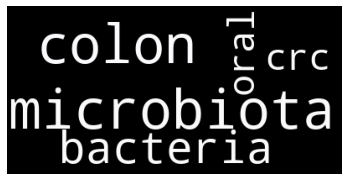

In [123]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
from PIL import Image
import numpy as np

Paper = '''The human organism coexists with its microbiota in a symbiotic relationship. 
These polymicrobial communities are involved in many crucial functions, such as immunity, protection against pathogens, and metabolism of dietary compounds, thus maintaining homeostasis. 
The oral cavity and the colon, although distant anatomic regions, are both highly colonized by distinct microbiotas. However, studies indicate that oral bacteria are able to disseminate into the colon. 
This is mostly evident in conditions such as periodontitis, where specific bacteria, namely Fusobacterium nucrelatum and Porphyromonas gingivalis project a pathogenic profile. 
In the colon these bacteria can alter the composition of the residual microbiota, in the context of complex biofilms, resulting in intestinal dysbiosis. 
This orally-driven disruption promotes aberrant immune and inflammatory responses, eventually leading to colorectal cancer (CRC) tumorigenesis. 
Understanding the exact mechanisms of these interactions will yield future opportunities regarding prevention and treatment of CRC.'''

max_words = 15

# 前處理
Paper = Paper.lower()
for ch in '!"#$&()*+,-./:;<=>?@[\\]^_{|}·~‘’':
    Paper = Paper.replace(ch,"")
words = Paper.split()

# 統計
fd = nltk.FreqDist(words).most_common()
number = 0
for each in fd :
    if each[1] <= 1 :
        break
    if each[0] not in STOPWORDS  :
        print(each)
        number += 1
        if number >= max_words :
            break

print(number)




# 文字雲
backgroud_Image = plt.imread('D:/Record/NLP/white.jpg')   # 自己可以换
wc = WordCloud(
               background_color = 'black',
#               mask = backgroud_Image,
                max_words = number,
                min_word_length = 2, # 一個單詞必須包含的最少字母數
#               collocation_threshold = 2,
                stopwords = STOPWORDS,   # 设置停用词
#               max_font_size = 200,      # 设置字体最大值
                random_state = 30        # 设置随机数，有多少种配色方案
                
               ) 
wc.generate(' '.join(words))
image_colors = ImageColorGenerator(backgroud_Image)
wc.recolor(color_func = image_colors)



plt.imshow(wc)
plt.axis('off')
plt.show()

# BioNLP

參考 : https://www.itread01.com/content/1546423754.html

# BioNER

https://www.cnblogs.com/robert-dlut/p/11593290.html